In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib
import pandas as pd
import os
import re
from tqdm import tqdm
from matplotlib.pyplot import cm

color_array=np.linspace(0,1,11)
cmap = plt.cm.tab20b

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the notebook wider
plt.style.use('default')

In [2]:
sim_time=1000
time_step_calc = 0.2
n_iter = sim_time/time_step_calc
step_time_out = 10/time_step_calc #out every step for now
time = np.linspace(start=0, stop= n_iter*time_step_calc - step_time_out*time_step_calc, num= (int) (n_iter/step_time_out))

In [3]:
data_dir = '/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/'

In [152]:
rad_surface =np.array([])
height_surface = np.array([])
vel_r_surface=np.array([])
vel_z_surface=np.array([])
grid_surface=np.array([])
count=0
# data = pd.DataFrame(columns=['r', 'z', 'vel_r', 'vel_z', 'rho'])
data_vel = pd.DataFrame()
for f in tqdm(os.listdir(data_dir)):
    if('grid' in data_dir + f):
        grid_test = float(f.split("_")[1])
        f_grid = data_dir  + f
        print(f_grid)
        # if(grid_test!=0.03):
        #     continue
        for f_g in (os.listdir(f_grid)):
            if('data_iter_' in f_g):
                # time_array.append(f_g.split('_')[2].split('.')[0])
                df=pd.read_csv(data_dir+f+'/'+f_g, delimiter=',',names=['r', 'z', 'vel_r', 'vel_z', 'rho'])
                # max_df = df[df.rho == df.rho.max()]#.iloc[0]
                # if(len(max_df)>1):
                #     print("Found it!")
                #     max_df = df[df.rho == df.rho.max()].iloc[0]
                #     break
                # if(grid_test==0.03):
                #     print(df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 5.02) & (df['z'] > 4.98)])
                #     break
                try:
                    # rad = np.append(rad, max_df.r.values==15)
                    # rad_df = df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 5.02) & (df['z'] > 4.98)]
                    rad_df = df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] ==grid_test)]
                    # if(grid_test==0.03):
                    #     print("We shoud append", rad_df)
                    #     break
                    if (len(rad_df)>0):
                        if(len(rad_df)>1):
                            rad_df=rad_df.head(1)
                        # pd.concat([data_vel, rad_df], ignore_index=True)
                        rad_surface = np.append(rad_surface, rad_df.r.values)
                        height_surface = np.append(height_surface, rad_df.z.values)
                        vel_r_surface=np.append(vel_r_surface,rad_df.vel_r.values)
                        vel_z_surface=np.append(vel_z_surface,rad_df.vel_z.values)
                        a=np.empty(len(rad_df.vel_z.values)); a.fill(float(f.split("_")[1]))
                        grid_surface=np.append(grid_surface,a)
                except IndexError:
                    count+=1
                    continue
                # rad.append(max_df.r.values[0])
                # height.append(max_df.z.values[0])
                # vel.append((max_df.vel_r.values[0]**2 + max_df.vel_z.values[0]**2)**0.5)
                # grid.append(f.split("_")[1])
print("Number skipped was", count)

  0%|          | 0/10 [00:00<?, ?it/s]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0200


 10%|█         | 1/10 [00:10<01:33, 10.37s/it]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0500
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0350


 30%|███       | 3/10 [00:15<00:31,  4.45s/it]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0300


 40%|████      | 4/10 [00:21<00:31,  5.23s/it]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0050
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0250


 60%|██████    | 6/10 [00:29<00:17,  4.48s/it]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0100
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0550
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0150
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0400


100%|██████████| 10/10 [00:33<00:00,  3.34s/it]

Number skipped was 0


In [161]:
print(len(vel_z_surface))

501


In [153]:
print(rad_surface[grid_surface==0.02])

[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]


In [154]:
print(np.intersect1d(grid,grid_surface))

[0.02  0.025 0.03  0.035]


In [155]:
rad =np.array([])
height = np.array([])
vel_r=np.array([])
vel_z=np.array([])
grid=np.array([])
count=0
# data = pd.DataFrame(columns=['r', 'z', 'vel_r', 'vel_z', 'rho'])
data_vel = pd.DataFrame()
for f in tqdm(os.listdir(data_dir)):
    if('grid' in data_dir + f):
        grid_test = float(f.split("_")[1])
        f_grid = data_dir  + f
        print(f_grid)
        # if(grid_test!=0.03):
        #     continue
        for f_g in (os.listdir(f_grid)):
            if('data_iter_' in f_g):
                # time_array.append(f_g.split('_')[2].split('.')[0])
                df=pd.read_csv(data_dir+f+'/'+f_g, delimiter=',',names=['r', 'z', 'vel_r', 'vel_z', 'rho'])
                # max_df = df[df.rho == df.rho.max()]#.iloc[0]
                # if(len(max_df)>1):
                #     print("Found it!")
                #     max_df = df[df.rho == df.rho.max()].iloc[0]
                #     break
                # if(grid_test==0.03):
                #     print(df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 5.02) & (df['z'] > 4.98)])
                #     break
                try:
                    # rad = np.append(rad, max_df.r.values==15)
                    # rad_df = df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 5.02) & (df['z'] > 4.98)]
                    rad_df = df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 0.12) & (df['z'] > 0.08)]
                    # if(grid_test==0.03):
                    #     print("We shoud append", rad_df)
                    #     break
                    if (len(rad_df)>0):
                        if(len(rad_df)>1):
                            rad_df=rad_df.head(1)
                        # pd.concat([data_vel, rad_df], ignore_index=True)
                        rad = np.append(rad, rad_df.r.values)
                        height = np.append(height, rad_df.z.values)
                        vel_r=np.append(vel_r,rad_df.vel_r.values)
                        vel_z=np.append(vel_z,rad_df.vel_z.values)
                        a=np.empty(len(rad_df.vel_z.values)); a.fill(float(f.split("_")[1]))
                        grid=np.append(grid,a)
                except IndexError:
                    count+=1
                    continue
                # rad.append(max_df.r.values[0])
                # height.append(max_df.z.values[0])
                # vel.append((max_df.vel_r.values[0]**2 + max_df.vel_z.values[0]**2)**0.5)
                # grid.append(f.split("_")[1])
print("Number skipped was", count)

  0%|          | 0/10 [00:00<?, ?it/s]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0200


 10%|█         | 1/10 [00:10<01:32, 10.26s/it]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0500
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0350


 30%|███       | 3/10 [00:14<00:30,  4.34s/it]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0300


 40%|████      | 4/10 [00:21<00:31,  5.21s/it]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0050
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0250


 60%|██████    | 6/10 [00:29<00:17,  4.49s/it]

/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0100
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0550
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0150
/pscratch/sd/k/kbhimani/siggen_ccd_data/velocity_test/grid_0.0400


100%|██████████| 10/10 [00:33<00:00,  3.34s/it]

Number skipped was 0


In [119]:
print(len(grid))
print(len(rad))

499
499


In [121]:
np.savetxt('plot_data/rad.txt', rad)
np.savetxt('plot_data/height.txt', height)
np.savetxt('plot_data/vel_r.txt', vel_r)
np.savetxt('plot_data/vel_z.txt', vel_z)
np.savetxt('plot_data/grid.txt', grid)

In [122]:
rad = np.loadtxt('plot_data/rad.txt')
height = np.loadtxt('plot_data/height.txt')
vel_r = np.loadtxt('plot_data/vel_r.txt')
vel_z = np.loadtxt('plot_data/vel_z.txt')
grid = np.loadtxt('plot_data/grid.txt')

In [123]:
print(len(height))

499


In [124]:
print(vel_r[(rad==15.0000)&(height==5.0000)&(grid==0.02)])

[-3.765007 -3.764987 -3.765008 -3.764996 -3.764983 -3.764996 -3.76097
 -3.764999 -3.765    -3.764984 -3.764995 -3.761706 -3.764984 -3.764982
 -3.765008 -3.764987 -3.763952 -3.764996 -3.764988 -3.761188 -3.765008
 -3.764984 -3.763429 -3.764995 -3.764999 -3.765007 -3.765007 -3.765008
 -3.764996 -3.765008 -3.765007 -3.764988 -3.765    -3.765007 -3.764987
 -3.760751 -3.765008 -3.765007 -3.764996 -3.764982 -3.764999 -3.764988
 -3.764988 -3.762478 -3.764999 -3.765007 -3.764987 -3.764979 -3.765008
 -3.762793 -3.7612   -3.760822 -3.764083 -3.764966 -3.764996 -3.76498
 -3.764995 -3.765007 -3.762036 -3.764978 -3.765    -3.764982 -3.764981
 -3.765    -3.765    -3.764984 -3.765    -3.765    -3.764995 -3.764999
 -3.765    -3.762902 -3.764988 -3.764984 -3.764981 -3.76498  -3.765007
 -3.764999 -3.765007 -3.764978 -3.765    -3.765008 -3.764638 -3.760868
 -3.764999 -3.764995 -3.765    -3.765    -3.765008 -3.764987 -3.765007
 -3.765008 -3.761512 -3.761834 -3.765008 -3.765008 -3.764988 -3.764988
 -3.7650

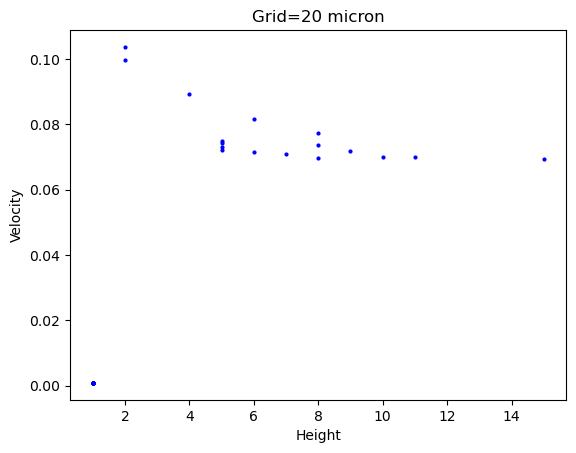

In [248]:
g =0.02
r = rad[grid==g]
v_r = vel_r[grid==g]
v_z = vel_z[grid==g]
z = height[grid==g]
time_array=np.linspace(0,(len(r)-1)*10,len(r))
plt.plot(z, (v_r**2+v_z**2)**0.5 * g,'bo', markersize=2)
plt.xlabel('Height')
plt.ylabel('Velocity')
plt.title('Grid=20 micron')
plt.savefig('figs/g_20_h.png')

In [169]:
color = iter(cm.jet(np.linspace(0, 1, len(np.unique(grid)))))
for g in tqdm(np.unique(grid)):
    cut = (rad<15.02) & (rad>14.98) &(height<5.02)&(height>4.98)&(grid==g)
    r = rad[cut]
    v_r = vel_r[cut]
    v_z = vel_z[cut]
    time_array=np.linspace(0,(len(r)-1)*10,len(r))
    c = next(color)
    # plt.plot(time_array, (v_r**2+v_z**2)**0.5 * g,'o', markersize=2, c=c, label='grid='+str(g))
    plt.plot(g, (((v_r**2+v_z**2)**0.5 * g)[0]),'o', markersize=5, c=c, label='grid='+str(g))

plt.xlabel('Grid')
plt.ylabel('Velocity (mm/ns)')
plt.ylim(0.06,0.10)
plt.title("Velocities magnitudes at r=15, z=5")
plt.legend()
plt.savefig('figs/grids.png')

  0%|          | 0/4 [00:00<?, ?it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

100%|██████████| 4/4 [00:00<00:00, 261.04it/s]


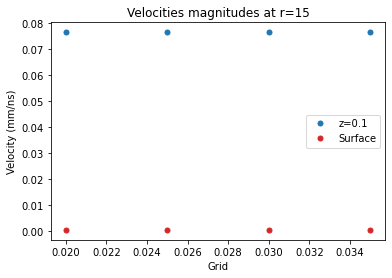

In [171]:
color = iter(cm.jet(np.linspace(0, 1, len(np.unique(grid)))))
for g in tqdm(np.intersect1d(grid,grid_surface)):
    cut = (grid==g)
    r = rad[cut]
    v_r = vel_r[cut]
    v_z = vel_z[cut]
    cut_surface = (grid_surface==g)
    r_surface = rad_surface[cut_surface]
    v_r_surface = vel_r_surface[cut_surface]
    v_z_surface = vel_z_surface[cut_surface]
    time_array=np.linspace(0,(len(r)-1)*10,len(r))
    c = next(color)
    plt.plot(g, (((v_r**2+v_z**2)**0.5 * g)[0]),'o', markersize=5, c='tab:blue', label='z=0.1')
    plt.plot(g, (((v_r_surface**2+v_z_surface**2)**0.5 * g)[0]),'o', markersize=5, c='tab:red', label='z=0.1')

plt.xlabel('Grid')
plt.ylabel('Velocity (mm/ns)')
# plt.ylim(0.06,0.10)
plt.title("Velocities magnitudes at r=15")
plt.legend(['z=0.1', 'Surface'])
plt.savefig('figs/surface_comp.png')